In [11]:
#from SSIM_PIL import compare_ssim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from SSIM_PIL import compare_ssim

import skimage
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
from skimage.io import imread
import os

iteration=20

In [12]:
#def get_Noise(img,d): #getting salt and paper noise
    ##return skimage.util.random_noise(img, mode='s&p', amount=d)
    #paper=d
    #salt=1-d
    #row, col=img.size
    #row, col=img.shape
    #g=np.matrix(img).reshape(row, col)
    #for i in range(row):
        #for j in range(col):
            #ran=np.random.random()
            #if ran<paper:
                #g[i,j]=0
            #elif ran>salt:
                #g[i,j]=255
            #else:
                #g[i,j]=img[i,j]
    #return g

In [13]:
def get_Noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

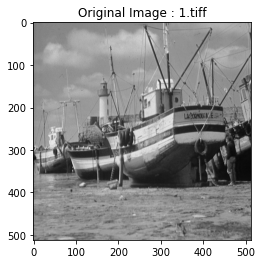

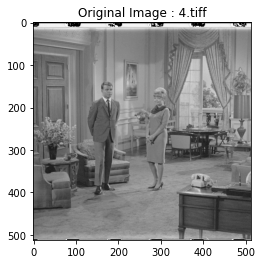

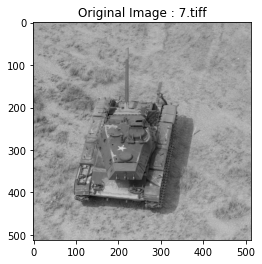

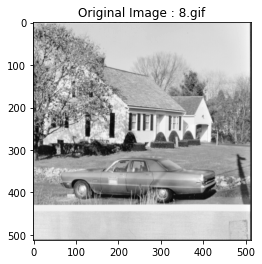

In [14]:
path=r'C://Users//Biswarup Mistry//Desktop//Misc1//db//' #defining the image directory path
#path=r'C://Users//BRSC-13//Desktop//CMSM_2102279_(21-22)//ML_Projects//Misc1//db//'  #defining the image directory path
dir_list = os.listdir(path)
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
      
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()

In [15]:
def SSIMVsNoiseDensity():   #getting corresponding mse(s) for given noise density 'd'
    dataframe = pd.DataFrame()    
    for item in dir_list :
        k=str(path+str(item))
        img = imread(k)
        x=[]
        y=[]
        df=np.array([])
        i=iteration
        d=0.0
        while(i>0 and d<=1.0):
            noise_img=get_Noise(img,d) #getting noisy image
            #mse=np.square(np.subtract(img,noise_img)).mean() #calculating MSE of Original image and Image with Noise
            #img = np.asarray(img)
            SSIM = ssim(img,noise_img) #calculating SSIM of Original image and Image with Noise

            x.append(d)
            y.append(SSIM)
            df=np.append(df,SSIM)
            d=d+0.05
            i=i-1
        dataframe[item] = df
    dataframe.to_csv('SSIMvsNoiseDensity.csv', index=False)


In [16]:
SSIMVsNoiseDensity() #creating the Mse(s) csv file
data=pd.read_csv('SSIMvsNoiseDensity.csv')
data


,1.tiff,4.tiff,7.tiff,8.gif
0,1.000000,1.000000,1.000000,1.000000
1,0.390176,0.372416,0.309878,0.406188
2,0.232358,0.212115,0.152860,0.242880
3,0.164490,0.147016,0.099449,0.170397
4,0.128726,0.112300,0.071275,0.134368
5,0.101102,0.089024,0.055516,0.106418
6,0.082723,0.070808,0.043957,0.087274
7,0.069294,0.059418,0.034938,0.072186
8,0.058658,0.050104,0.029260,0.060532
9,0.049445,0.043171,0.025751,0.051983


In [17]:
df=pd.DataFrame(data)
def combined(dir_list,iteration): #for combined graph ploting of MSE(s) vs Noise Density
    x=[]
    d=0.0
    while iteration>0:
        x.append(d)
        d=d+0.05 
        iteration=iteration-1
    plt.title('SSIM(s) vs Density')
    plt.xlabel('density')
    plt.ylabel('SSIM(s)') 
    for item in dir_list:
        plt.scatter(x,df[item],marker='o')
        plt.plot(x,df[item])
    plt.axvline(0.5, color='k', linestyle='--')
    plt.show()

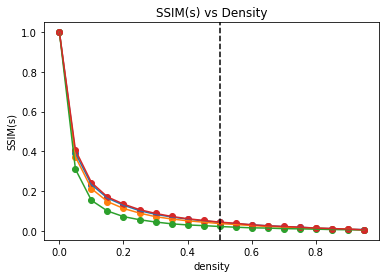

In [18]:
combined(dir_list,iteration) 

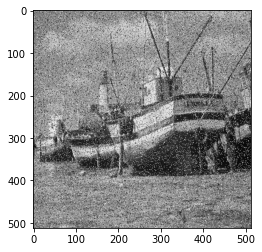

0.16394705856769798


In [19]:
d=0.15
#path=r'C://Users//BRSC-13//Desktop//CMSM_2102279_(21-22)//ML_Projects//Misc1//db//'  #defining the image directory path
path=r'C://Users//Biswarup Mistry//Desktop//Misc1//db//' 
item='1.tiff' #image name
k=str(path+str(item))
#img = imread(k)
img= Image.open(k)
img = np.asarray(img)
img1=get_Noise(img,d)
plt.imshow(img1,cmap=plt.cm.gray)
plt.show()
#noise_img=get_Noise(img,d) 
SSIM = ssim(img,img1) #calculating SSIM of Original image and Image with Noise
#ssim1=compare_ssim(img,img1) #calculating SSIM of Original Image with SSIM_PIL
print(SSIM)
#print(ssim1)